<a href="https://colab.research.google.com/github/Tirta2241720045/Machine_Learning/blob/main/Week5(P5)(GC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 5
Klasifikasi Citra Siang dan Malam

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Langkah 0 - Import Library

In [7]:
# Import Required Libraries
from pathlib import Path # Path manipulation
import matplotlib.image as mpimg # Image reading
import matplotlib.pyplot as plt # Plotting
import cv2 # Image manipulation
import random # Random number generation
import numpy as np # Array manipulation
import pandas as pd # Data manipulation

Kode tersebut mengimpor beberapa pustaka yang digunakan dalam manipulasi dan visualisasi gambar serta pengelolaan data. **`Path`** membantu dalam manipulasi direktori dan file, sementara **`matplotlib.image`** dan **`cv2`** digunakan untuk membaca dan memanipulasi gambar. **`matplotlib.pyplot`** berfungsi untuk memvisualisasikan gambar dan data, sedangkan **`random`** digunakan untuk menghasilkan bilangan acak. **`numpy`** memungkinkan manipulasi array atau matriks, dan **`pandas`** digunakan untuk mengelola dan memanipulasi data berbentuk tabel. Ketika kode ini dijalankan, gambar dapat dibaca, diolah, dan divisualisasikan, serta data yang relevan bisa dimanipulasi dan diolah untuk berbagai analisis.

Lakukan ekstraksi data gambar, kemudian definisikan lokasi gambar. Pada contoh ini, folder gambar berlokasi sama dengan lokasi file python

In [8]:
# Image directories
train_dir = "/content/drive/MyDrive/dataset/images/training" # Training directory
test_dir = "/content/drive/MyDrive/dataset/images/test" # Testing directory

Kode tersebut mendefinisikan dua direktori untuk dataset gambar: **`train_dir`** untuk menyimpan gambar pelatihan dan **`test_dir`** untuk gambar pengujian. Gambar dalam **`train_dir`** digunakan untuk melatih model, sementara gambar dalam **`test_dir`** digunakan untuk mengevaluasi performa model setelah pelatihan.

# Langkah 1 - Load Data dan Visualisasikan

In [9]:
def load_dataset(img_dir): # Load dataset
    p = Path(img_dir) # Path object
    dirs = p.glob('*') # Iterate through all the files in the

    img_list = [] # List to store image data

    for dir in dirs: # Iterate through all the files in the directory
        label = str(dir).split('/')[-1] # Get the label of the image
        for file in dir.glob('*.jpg'): # Iterate through all the files in the directory
            img = mpimg.imread(file) # Read the image

            if not img is None: # If the image is not empty
                img_list.append((img, label)) # Append the image and the label to the list

    return img_list     # Return the list

Fungsi **`load_dataset(img_dir)`** digunakan untuk memuat gambar dari direktori yang diberikan. Fungsi ini membaca semua file gambar `.jpg` dari subdirektori, mengidentifikasi label berdasarkan nama folder, dan menyimpan pasangan gambar serta label dalam sebuah list. Hasil akhirnya adalah list yang berisi gambar dan label dari dataset.

In [10]:
# Load training data
train_img = load_dataset(train_dir) # Load training data

Kode tersebut memuat data gambar untuk pelatihan menggunakan fungsi **`load_dataset`** dengan direktori **`train_dir`**. Hasilnya, variabel **`train_img`** akan berisi list gambar dan label yang berasal dari dataset pelatihan yang telah di-load.

In [11]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))  # Pick a random image

# Check img size
print(f'Image {pick_random}') # Print the image number
print(train_img[pick_random][0].shape) # Print the image size

Image 214
(737, 1024, 3)


Kode tersebut secara acak memilih satu gambar dari dataset pelatihan untuk memeriksa ukurannya. **`np.random.randint(0, len(train_img))`** digunakan untuk memilih indeks gambar secara acak dari list **`train_img`**. Kemudian, ukuran gambar tersebut dicetak menggunakan **`train_img[pick_random][0].shape`**, yang menunjukkan dimensi gambar (tinggi, lebar, dan jumlah saluran warna).

In [12]:
# Function to Visualize
def random_img_viz(img_list): # Function to visualize random images
    rand_num = np.random.randint(0, len(img_list)) # Pick a random number

    img = img_list[rand_num][0] # Get the image
    label = img_list[rand_num][1] # Get the label
    label_str = 'day' if label == 1 else 'night' # Convert the label to string

    plt.imshow(img) # Show the image
    print(f'Shape\t: {img.shape}')  # Print the image shape
    print(f'Label\t: {label}')  # Print the label

Fungsi **`random_img_viz(img_list)`** digunakan untuk memvisualisasikan gambar secara acak dari list yang diberikan. Fungsi ini memilih indeks gambar secara acak, kemudian mengambil gambar dan label terkait. Label diubah menjadi string ('day' atau 'night') berdasarkan nilai label. Gambar kemudian ditampilkan menggunakan **`plt.imshow`**, dan ukuran serta label gambar dicetak.

Shape	: (471, 640, 3)
Label	: day


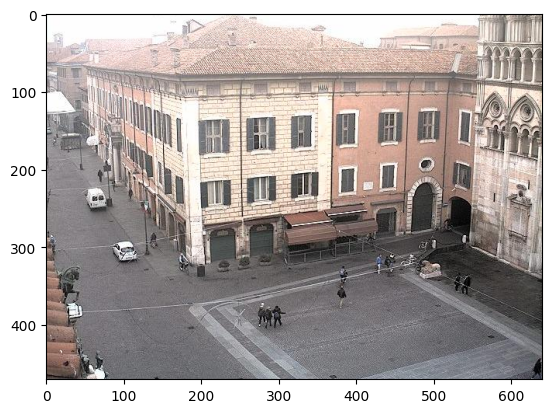

In [13]:
random_img_viz(train_img) # Visualize random image

Kode tersebut memanggil fungsi **`random_img_viz(train_img)`** untuk menampilkan gambar acak dari dataset pelatihan. Saat dijalankan, fungsi ini akan menampilkan gambar beserta ukuran dan labelnya, memberikan gambaran visual tentang data yang digunakan untuk pelatihan model.

# Langkah 3 - Pra Pengolahan Data

In [14]:
def standarized_input(image): # Standarized
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600)) # Resize the image

    return std_img # Return the image

Fungsi **`standarized_input(image)`** digunakan untuk menstandarisasi ukuran gambar. Fungsi ini mengubah ukuran gambar input menjadi lebar 1100 piksel dan tinggi 600 piksel menggunakan **`cv2.resize`**. Hasilnya adalah gambar yang telah diubah ukurannya dan siap untuk diproses lebih lanjut.

In [15]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0 # Initialize the number value

    if(label == 'day'): # If the label is day
        num_val = 1 # Set the number value to 1

    return num_val # Return the number value

Fungsi **`label_encoder(label)`** digunakan untuk mengubah label kategori menjadi nilai numerik. Fungsi ini menginisialisasi **`num_val`** dengan 0, lalu jika label adalah 'day', maka **`num_val`** diubah menjadi 1. Fungsi mengembalikan nilai numerik ini, yang memudahkan dalam pemrosesan data untuk model.

In [16]:
def preprocess(img_list): # Preprocess the image list
    std_img_list = [] # Initialize the list

    for item in img_list: # Iterate through the image list
        image = item[0] # Get the image
        label = item[1] # Get the label

        # Standarized the image
        std_img = standarized_input(image) # Standarized the image

        # Create the label
        img_label = label_encoder(label) # Encode the label

        std_img_list.append((std_img, img_label)) # Append the standarized image and the label to the list

    return std_img_list  # Return the list

Fungsi **`preprocess(img_list)`** digunakan untuk memproses daftar gambar dan label. Fungsi ini menginisialisasi list kosong **`std_img_list`**, kemudian mengiterasi setiap item dalam **`img_list`**. Setiap gambar diubah ukurannya menggunakan **`standarized_input`**, dan labelnya diubah menjadi nilai numerik dengan **`label_encoder`**. Hasilnya, pasangan gambar yang telah distandarisasi dan labelnya ditambahkan ke **`std_img_list`**, yang kemudian dikembalikan sebagai output fungsi.

In [17]:
train_std_img_list = preprocess(train_img) # Preprocess the training image

Kode tersebut memanggil fungsi **`preprocess(train_img)`** untuk memproses daftar gambar pelatihan. Hasilnya, variabel **`train_std_img_list`** akan berisi daftar gambar yang telah distandarisasi dan label yang telah dienkode, siap untuk digunakan dalam pelatihan model.

In [18]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list)) # Pick a random image

# Check img size
print(f'Image {pick_random}')   # Print the image number
print(train_std_img_list[pick_random][0].shape) # Print the image size

Image 195
(600, 1100, 3)


Kode tersebut secara acak memilih satu gambar dari daftar yang telah diproses, **`train_std_img_list`**, untuk memeriksa ukurannya. Menggunakan **`np.random.randint(0, len(train_std_img_list))`**, kode ini memilih indeks gambar secara acak. Selanjutnya, ukuran gambar dicetak dengan **`train_std_img_list[pick_random][0].shape`**, menampilkan dimensi gambar yang telah distandarisasi.

Shape	: (600, 1100, 3)
Label	: 0


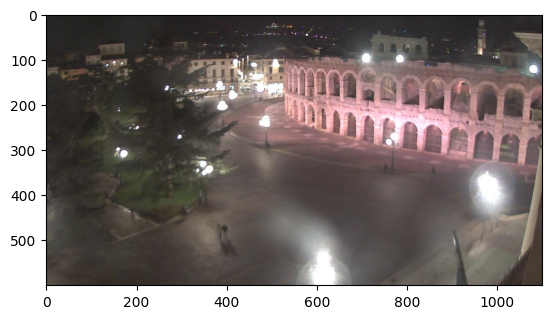

In [19]:
random_img_viz(train_std_img_list)  # Visualize random image

Kode tersebut memanggil fungsi **`random_img_viz(train_std_img_list)`** untuk menampilkan gambar acak dari daftar yang telah diproses. Saat dijalankan, fungsi ini akan menampilkan gambar beserta ukuran dan label yang telah dienkode, memberikan gambaran visual tentang data pelatihan yang sudah distandarisasi.

# Langkah 4 - Ekstraksi Fitur

In [20]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):  # Get the average brightness of the image
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)    # Convert the image to HSV

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]  # Calculate the area of the image
    avg = sum_brightness / area # Calculate the average brightness

    return avg  # Return the average brightness

Fungsi **`avg_brightness(image)`** digunakan untuk menghitung kecerahan rata-rata gambar. Fungsi ini pertama-tama mengonversi gambar dari ruang warna RGB ke HSV menggunakan **`cv2.cvtColor`**. Kemudian, fungsi menjumlahkan nilai kecerahan (channel V) dan membagi hasilnya dengan luas gambar untuk mendapatkan kecerahan rata-rata. Akhirnya, fungsi mengembalikan nilai kecerahan rata-rata tersebut.

Image 150
Avg Brighness: 25.6786


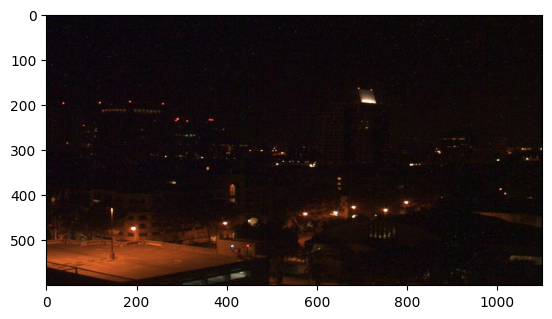

In [21]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))    # Pick a random image

feature_img = train_std_img_list[rand_img][0]   # Get the image

avg_img = avg_brightness(feature_img)   # Get the average brightness of the image

print(f'Image {rand_img}')  # Print the image number
print(f'Avg Brighness: {avg_img:.4f}')  # Print the average brightness
plt.imshow(feature_img) # Show the image

Kode tersebut memilih gambar acak dari daftar **`train_std_img_list`** dan menghitung kecerahan rata-ratanya menggunakan fungsi **`avg_brightness`**. Dengan menggunakan **`np.random.randint(0, len(train_std_img_list))`**, kode ini memilih indeks gambar secara acak. Setelah mendapatkan gambar, kecerahan rata-ratanya dihitung dan dicetak. Terakhir, gambar ditampilkan menggunakan **`plt.imshow`**.

# Langkah 5 - Klasifikasi dengan Metode Threshold

In [22]:
def predict_label(img, threshold):  # Predict the label based on the average brightness
    # Computer average brightness
    avg = avg_brightness(img)   # Get the average brightness
    pred = 0    # Initialize the prediction

    # Predict the label based on user defined threshold
    if avg > threshold: # If the average brightness is greater than the threshold
        pred = 1    # Set the prediction to 1

    return pred # Return the prediction

Fungsi **`predict_label(img, threshold)`** digunakan untuk memprediksi label gambar berdasarkan kecerahan rata-ratanya. Fungsi ini pertama-tama menghitung kecerahan rata-rata gambar menggunakan **`avg_brightness`**. Kemudian, jika kecerahan rata-rata melebihi ambang batas yang ditentukan (**`threshold`**), fungsi akan mengatur prediksi (**`pred`**) menjadi 1. Akhirnya, fungsi mengembalikan nilai prediksi ini.

Image 158
Actual label: 0
Predicted label: 0


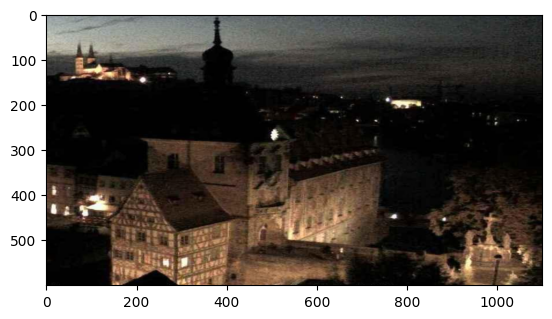

In [23]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))    # Pick a random image

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)    # Predict the label

# Evaluate
print(f'Image {rand_img}')  # Print the image number
print(f'Actual label: {train_std_img_list[rand_img][1]}')   # Print the actual label
print(f'Predicted label: {pred}')   # Print the predicted label
plt.imshow(train_std_img_list[rand_img][0])   # Show the image

Kode tersebut menguji fungsi klasifikasi pada gambar acak dari daftar **`train_std_img_list`**. Dengan memilih indeks gambar secara acak, kode ini memprediksi label gambar menggunakan **`predict_label`** dengan ambang batas yang ditetapkan (120). Hasilnya, kode mencetak nomor gambar, label aktual, dan label yang diprediksi. Gambar tersebut juga ditampilkan menggunakan **`plt.imshow`** untuk visualisasi.

# Langkah 6 - Evaluasi (Manual)

In [24]:
def evaluate(img_list, threshold):  # Evaluate the model
    miss_labels = []    # Initialize the list

    for file in img_list:   # Iterate through the image list
        # Get the ground truth / correct label
        img = file[0]   # Get the image
        label = file[1] # Get the label

        # Get prediction
        pred_label = predict_label(img, threshold)  # Predict the label

        # Compare ground truth and pred
        if pred_label != label:   # If the prediction is wrong
            miss_labels.append((img, pred_label, label))    # Append the image, prediction, and label to the list

    total_img = len(img_list)   # Get the total number of images
    corr_pred = total_img - len(miss_labels)        # Get the number of correct predictions
    accuracy = corr_pred / total_img    # Calculate the accuracy

    print(f'Accuracy: {accuracy:.4f}')  # Print the accuracy

Fungsi **`evaluate(img_list, threshold)`** digunakan untuk mengevaluasi model klasifikasi. Fungsi ini menginisialisasi list kosong **`miss_labels`** untuk menyimpan gambar yang diprediksi salah. Untuk setiap gambar dalam **`img_list`**, fungsi mengambil gambar dan labelnya, kemudian memprediksi label menggunakan **`predict_label`**. Jika prediksi salah, informasi tentang gambar, prediksi, dan label yang benar ditambahkan ke **`miss_labels`**. Setelah iterasi selesai, fungsi menghitung akurasi berdasarkan jumlah prediksi yang benar dan mencetak nilai akurasi tersebut.

In [25]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120) # Evaluate the model

Accuracy: 0.8417


Kode tersebut memanggil fungsi **`evaluate`** untuk menguji model klasifikasi pada data pelatihan **`train_std_img_list`** dengan ambang batas 120. Fungsi ini akan menghitung akurasi model berdasarkan prediksi yang dilakukan terhadap gambar dalam dataset, serta mencetak nilai akurasi sebagai hasil evaluasi.

In [26]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)   # Load the test data

# Preprocess
test_std_img_list = preprocess(test_img)    # Preprocess the test data

# Predict
evaluate(test_std_img_list, threshold=120)  # Evaluate the model

Accuracy: 0.8688


# Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM
# Langkah 4 alternatif - Membuat Feature Vectors

Kode tersebut melakukan evaluasi model pada data pengujian. Pertama, data gambar dari direktori **`test_dir`** dimuat menggunakan fungsi **`load_dataset`**. Selanjutnya, gambar tersebut diproses dengan fungsi **`preprocess`** untuk menstandarisasi ukuran dan mengonversi label. Akhirnya, fungsi **`evaluate`** dipanggil untuk menghitung akurasi model pada dataset pengujian dengan menggunakan ambang batas 120, dan hasilnya dicetak.

In [27]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):   # Extract the average brightness feature
    avg_list = []   # Initialize the list
    labels = []    # Initialize the list

    for img in img_list:    # Iterate through the image list
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)    # Append the average brightness to the list
        labels.append(img_label)    # Append the label to the list

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))  # Stack the data
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])   # Create a dataframe

    return df   # Return the dataframe

Fungsi **`extract_avg_bright_feature(img_list)`** digunakan untuk mengekstrak fitur kecerahan rata-rata dari setiap gambar dan menyimpannya dalam format tabel menggunakan **Pandas DataFrame**. Fungsi ini menginisialisasi dua list kosong, **`avg_list`** untuk menyimpan nilai kecerahan rata-rata dan **`labels`** untuk menyimpan label gambar. Dalam iterasi terhadap **`img_list`**, fungsi menghitung kecerahan rata-rata setiap gambar dan menambahkannya ke **`avg_list`**, serta menyimpan label yang sesuai. Setelah itu, data digabungkan menjadi format kolom menggunakan **`np.column_stack`**, dan sebuah DataFrame dibuat dengan dua kolom: 'AVG_BRIGHT' dan 'LABELS'. Akhirnya, fungsi mengembalikan DataFrame tersebut.

In [28]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)  # Extract the average brightness feature
print(f'Shape: {train_avg_img.shape}')  # Print the shape of the dataframe
train_avg_img.head()    # Show the first 5 rows of the dataframe

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,115.025285,1.0
1,137.345858,1.0
2,129.237782,1.0
3,135.217648,1.0
4,192.907867,1.0


Kode tersebut memanggil fungsi **`extract_avg_bright_feature`** untuk mengekstrak fitur kecerahan rata-rata dari data pelatihan **`train_std_img_list`**. Hasilnya disimpan dalam variabel **`train_avg_img`**. Kemudian, kode mencetak bentuk DataFrame menggunakan **`train_avg_img.shape`** dan menampilkan lima baris pertama dari DataFrame dengan **`train_avg_img.head()`**, memberikan gambaran tentang struktur dan konten data yang diekstrak.

In [29]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)    # Extract the average brightness feature
print(f'Shape: {test_avg_img.shape}')   # Print the shape of the dataframe
test_avg_img.head() # Show the first 5 rows of the dataframe

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,124.351618,1.0
1,194.228062,1.0
2,185.917073,1.0
3,127.443791,1.0
4,117.273579,1.0


Kode tersebut memanggil fungsi **`extract_avg_bright_feature`** untuk mengekstrak fitur kecerahan rata-rata dari data pengujian **`test_std_img_list`**. Hasilnya disimpan dalam variabel **`test_avg_img`**. Kemudian, kode mencetak bentuk DataFrame menggunakan **`test_avg_img.shape`** dan menampilkan lima baris pertama dari DataFrame dengan **`test_avg_img.head()`**, memberikan gambaran tentang struktur dan konten data yang diekstrak dari dataset pengujian.

# Langkah 5 alternatif

In [30]:
# import requied library
from sklearn.svm import SVC # Support Vector Classifier

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)      # Get the feature
y_train = train_avg_img.iloc[:,1]       # Get the label
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)    # Get the feature
y_test = test_avg_img.iloc[:,1]    # Get the label

model = SVC()   # Initialize the model
model.fit(X_train, y_train) # Fit the model

SVC()

Kode tersebut mengimpor **`SVC`** dari pustaka **`sklearn`** untuk menggunakan Support Vector Classifier. Selanjutnya, data fitur dan label dipisahkan dari DataFrame pelatihan dan pengujian:

- **`X_train`** berisi fitur kecerahan rata-rata dari data pelatihan, diubah menjadi bentuk kolom.
- **`y_train`** berisi label dari data pelatihan.
- **`X_test`** dan **`y_test`** berfungsi sama untuk data pengujian.

Setelah mempersiapkan data, model SVC diinisialisasi dan dilatih menggunakan data pelatihan dengan **`model.fit(X_train, y_train)`**.

# Langkah 6 alternatif

In [31]:
from sklearn.metrics import accuracy_score  # Import accuracy score

# Make a prediction on train data
y_train_pred = model.predict(X_train)   # Predict the label

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)   # Calculate the accuracy

# Make a prediction on test data
y_test_pred = model.predict(X_test) # Predict the label

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)  # Calculate the accuracy

# Print Eval Result
print(f'Accuracy on train: {acc_train}')    # Print the accuracy on train data
print(f'Accuracy on test: {acc_test}')  # Print the accuracy on test data

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


Kode tersebut mengimpor **`accuracy_score`** dari pustaka **`sklearn.metrics`** untuk menghitung akurasi model. Pertama, model digunakan untuk memprediksi label pada data pelatihan dengan **`model.predict(X_train)`**, dan akurasi dihitung dengan membandingkan prediksi dengan label yang sebenarnya menggunakan **`accuracy_score`**. Selanjutnya, proses yang sama dilakukan untuk data pengujian. Akhirnya, kode mencetak akurasi untuk data pelatihan dan pengujian, memberikan gambaran tentang kinerja model pada kedua set data.